In [1]:
# Gute Fragestellung für datascience Projekt (Sportify)
# Gibt es einen Zusammenhang zwischen eigenen Musikgeschmack und der Geschmack der anderen?

# Importieren der benötigten Bibliotheken
import sys
import os as os
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials


# Variablen und Funktionsdeklarationen

Um mit spotipy auf die Daten zugreiffen zu können, müssen `CLIENT_ID` und `CLIENT_SECRET` zwingendermassen gesetzt sein. Die Variablen `USERSANGEETHS` und `USERSTIAFEN` notwendig da wir mit der Spotipy methode `user_playlist` arbeiten.

In [2]:
CLIENT_ID = "082b3dd7a97642d49b60a647673caa75"
CLIENT_SECRET = "276e4715f8a14a34a7622c0105a8588c"
USERSANGEETHS = "qme120m1x3bg2wrtw3haiiyrb"
USERSTIAFEN = "stiafen"

client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [3]:
# get all playlists of a user
def get_playlists(user):
    playlists = sp.user_playlists(user)
    playlist_ids = []
    while playlists:
        for i, playlist in enumerate(playlists['items']):
            playlist_ids.append(playlist['id'])
        if playlists['next']:
            playlists = sp.next(playlists)
        else:
            playlists = None
    return playlist_ids

In [4]:
playlistsSangeeths = get_playlists(USERSANGEETHS)
playlistsTiafen = get_playlists(USERSTIAFEN)

# get the name of the playlists, will later be used to print all available playlists for a user
def get_playlist_name(user, playlist_id):
    playlist = sp.user_playlist(user, playlist_id)
    return playlist['name'], playlist['id']


('Fav Songs Sangeeths', '2E7GAf1h3F19ezc18w1NpZ')
('Tamil Vibes', '64Lq6W07GIOs087K88iOzT')
('Arabic  Vibes', '1Rr83zHLDULxQDbC9taydm')
('Albanien Vibes', '6jyy1HUool6rj0xWLVsAPC')
('UK DRILL ', '5ycwKESGY1Z71ftYWmTVJs')
('Baba Vibes', '67a5HCEjwm4aXvjPVoxoAX')
('Favorite Songs Stiafen', '0ekbyk9EKkCf4MBjrQoM2D')
('Favorite Songs', '4DeCJm3aeeb0TTdthf8MGY')
('Caterpillar (feat. Eminem & King Green)', '1JKSl9B6hJNCGFs9FdOq8I')
('Meine Playlist Nr.\xa034', '3uBDJVShkGJKFxPNnjC7IL')
('Dein Mixtape\xa06 - ZUSAMMENGESTELLT FÜR STIAFEN:21.06.19', '48I13UCIzloZpyRE23zwIa')
('Mixtape 3', '2jnqcj5CxaBLHjzVafdmce')
('Oldschool', '4RjDNPzba04zlAan0a4bTE')


In [5]:
#Funktion welche mittels user und playlist ID alle Tracks für eine Playlist ausgibt
def get_playlist_tracks(user, playlist_id):
    results = sp.user_playlist_tracks(user, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

Um nun die ID der playlist zu erhalten, in welcher wir unsere Lieblingssongs gespeichert haben nutzen wir die zuvor definierte Funktion `get_playlist_name` welche über das Resultat der Funktion `get_playlists` für den jeweiligen Benutzer läuft.
Um die Übersicht zu behalten haben wir unsere Playlists *Fav Songs "NAME"* genannt

In [44]:
for playlist in playlistsSangeeths:
    print(get_playlist_name(USERSANGEETHS, playlist))

for playlist in playlistsTiafen:
    print(get_playlist_name(USERSTIAFEN, playlist))

('Fav Songs Sangeeths', '2E7GAf1h3F19ezc18w1NpZ')
('Tamil Vibes', '64Lq6W07GIOs087K88iOzT')
('Arabic  Vibes', '1Rr83zHLDULxQDbC9taydm')
('Albanien Vibes', '6jyy1HUool6rj0xWLVsAPC')
('UK DRILL ', '5ycwKESGY1Z71ftYWmTVJs')
('Baba Vibes', '67a5HCEjwm4aXvjPVoxoAX')
('Fav Songs Stiafen', '0ekbyk9EKkCf4MBjrQoM2D')
('Favorite Songs', '4DeCJm3aeeb0TTdthf8MGY')
('Caterpillar (feat. Eminem & King Green)', '1JKSl9B6hJNCGFs9FdOq8I')
('Meine Playlist Nr.\xa034', '3uBDJVShkGJKFxPNnjC7IL')
('Dein Mixtape\xa06 - ZUSAMMENGESTELLT FÜR STIAFEN:21.06.19', '48I13UCIzloZpyRE23zwIa')
('Mixtape 3', '2jnqcj5CxaBLHjzVafdmce')
('Oldschool', '4RjDNPzba04zlAan0a4bTE')


In [7]:
#Variablen für Playlists Sangeeths und Stiafen
favoritplaylistSangeeths = "2E7GAf1h3F19ezc18w1NpZ"
favoritplaylistStiafen = "0ekbyk9EKkCf4MBjrQoM2D"


# Für Beide User wird eine Dataframe mit allen Tracks erstellt
tracksSangeeths = get_playlist_tracks(USERSANGEETHS, favoritplaylistSangeeths)
tracksSangeeths = pd.DataFrame(tracksSangeeths)

tracksStiafen = get_playlist_tracks(USERSTIAFEN, favoritplaylistStiafen)
tracksStiafen = pd.DataFrame(tracksStiafen)

In [8]:
# just put colomn track in a new dataframe
tracksSangeeths = tracksSangeeths['track']
tracksStiafen = tracksStiafen['track']
# get all the info in colomn track
tracksSangeeths = tracksSangeeths.apply(pd.Series)
tracksStiafen = tracksStiafen.apply(pd.Series)
tracksStiafen

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,1463703,False,False,{'isrc': 'DESR72036116'},{'spotify': 'https://open.spotify.com/track/3d...,https://api.spotify.com/v1/tracks/3ddAtoSripae...,3ddAtoSripaeASJeovlIsg,False,Symphony No. 3 in D Minor: VI. Langsam. Ruhevo...,26,https://p.scdn.co/mp3-preview/87233ea4f437e0c7...,True,6,track,spotify:track:3ddAtoSripaeASJeovlIsg
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,378733,False,False,{'isrc': 'DEE861700261'},{'spotify': 'https://open.spotify.com/track/1O...,https://api.spotify.com/v1/tracks/1Oo7XEqkrwif...,1Oo7XEqkrwifJn17aA0ocF,False,"Sechs Klavierstücke, Op. 118: II. Intermezzo i...",63,https://p.scdn.co/mp3-preview/34054c2ef25c45bb...,True,9,track,spotify:track:1Oo7XEqkrwifJn17aA0ocF
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, BB, B...",1,295218,False,False,{'isrc': 'DEN960100244'},{'spotify': 'https://open.spotify.com/track/3o...,https://api.spotify.com/v1/tracks/3o9br9LskOEb...,3o9br9LskOEbwc5irxfHqR,False,"Serenade for Strings in E Major, Op. 22, B. 52...",50,https://p.scdn.co/mp3-preview/13d8aca9aac6e8ec...,True,4,track,spotify:track:3o9br9LskOEbwc5irxfHqR
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,1015880,False,False,{'isrc': 'GBF076510210'},{'spotify': 'https://open.spotify.com/track/2X...,https://api.spotify.com/v1/tracks/2XYx7hwJgEJI...,2XYx7hwJgEJIZCWLToR7oN,False,Rhapsody In Blue,4,https://p.scdn.co/mp3-preview/79aa88654353a32b...,True,1,track,spotify:track:2XYx7hwJgEJIZCWLToR7oN
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,132120,False,False,{'isrc': 'HKI190055512'},{'spotify': 'https://open.spotify.com/track/5T...,https://api.spotify.com/v1/tracks/5TtmI9sfXw4V...,5TtmI9sfXw4VXco0PE21mV,False,"2 Aquarelles: Lento, ma non troppo",61,https://p.scdn.co/mp3-preview/53e4cd9c2b3f4a4c...,True,12,track,spotify:track:5TtmI9sfXw4VXco0PE21mV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BD, BE, BG, BH, BO, BR, C...",1,254386,False,False,{'isrc': 'USGR10300580'},{'spotify': 'https://open.spotify.com/track/45...,https://api.spotify.com/v1/tracks/45mRiuCMudVf...,45mRiuCMudVfPbndTvTYnr,False,My Favorite Things,33,None,True,2,track,spotify:track:45mRiuCMudVfPbndTvTYnr
762,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AG, AL, AM, AO, AR, AT, AU, AZ, BA, BB, B...",1,154340,False,False,{'isrc': 'USCA28900529'},{'spotify': 'https://open.spotify.com/track/7n...,https://api.spotify.com/v1/tracks/7nCdeDrv9Tu4...,7nCdeDrv9Tu4nsT3K638em,False,Move,43,None,True,1,track,spotify:track:7nCdeDrv9Tu4nsT3K638em
763,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,387333,False,False,{'isrc': 'USBN28600264'},{'spotify': 'https://open.spotify.com/track/4Y...,https://api.spotify.com/v1/tracks/4YiP13DBr6os...,4YiP13DBr6osYKZd9KODGY,False,Lester Left Town,25,None,True,3,track,spotify:track:4YiP13DBr6osYKZd9KODGY
764,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AM, AR, AT, AU, AZ, BA, BD, BE, BG, 

In [27]:
#Get Audio features for all tracks in favorite Playlist
features = []
#Falls lokale Kopie der Daten existiert wird diese verwendet
if not os.path.isfile('audiofeatures_stiafen.csv'):
    for uri in tracksStiafen['uri']:
       features = features+sp.audio_features(uri)
    audioFeaturesStiafen = pd.DataFrame(features)
    audioFeaturesStiafen['user'] = "Stiafen"
    audioFeaturesStiafen.to_csv('audiofeatures_stiafen.csv')
else:
    audioFeaturesStiafen = pd.read_csv('audiofeatures_stiafen.csv')


if not os.path.isfile('audiofeatures_sangeeths.csv'):
    for uri in tracksSangeeths['uri']:
       features = features+sp.audio_features(uri)
    audioFeaturesSangeeths = pd.DataFrame(features)
    audioFeaturesSangeeths['user'] = "Sangeeths"
    audioFeaturesSangeeths.to_csv('audiofeatures_sangeeths.csv')
else:
    audioFeaturesSangeeths = pd.read_csv('audiofeatures_sangeeths.csv')

#Ausgabe zur Kontrolle
audioFeaturesSangeeths

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,user
0,0,0.851,0.630,10,-6.289,1,0.0725,0.0729,0.000204,0.2470,0.2160,115.985,audio_features,5erXSPunefKTlYNuZb3SMk,spotify:track:5erXSPunefKTlYNuZb3SMk,https://api.spotify.com/v1/tracks/5erXSPunefKT...,https://api.spotify.com/v1/audio-analysis/5erX...,235680,4,Sangeeths
1,1,0.712,0.939,9,-6.803,1,0.2470,0.2920,0.000002,0.0634,0.0389,75.989,audio_features,6Cta7rJuBen8XnyqAGhPhp,spotify:track:6Cta7rJuBen8XnyqAGhPhp,https://api.spotify.com/v1/tracks/6Cta7rJuBen8...,https://api.spotify.com/v1/audio-analysis/6Cta...,208798,4,Sangeeths
2,2,0.799,0.929,0,-3.231,0,0.0668,0.2530,0.000462,0.2400,0.9520,127.999,audio_features,1YOW5pnfikVa6BcCBIOQUU,spotify:track:1YOW5pnfikVa6BcCBIOQUU,https://api.spotify.com/v1/tracks/1YOW5pnfikVa...,https://api.spotify.com/v1/audio-analysis/1YOW...,231562,4,Sangeeths
3,3,0.837,0.513,1,-8.651,1,0.4830,0.4730,0.017800,0.1170,0.5570,159.966,audio_features,7Je6BkJF9PnQ3lefOw1RrT,spotify:track:7Je6BkJF9PnQ3lefOw1RrT,https://api.spotify.com/v1/tracks/7Je6BkJF9PnQ...,https://api.spotify.com/v1/audio-analysis/7Je6...,161868,4,Sangeeths
4,4,0.940,0.436,0,-10.112,1,0.4560,0.0747,0.000000,0.1130,0.2900,123.003,audio_features,6Y6J8CNHtOuklPhVnvmnm1,spotify:track:6Y6J8CNHtOuklPhVnvmnm1,https://api.spotify.com/v1/tracks/6Y6J8CNHtOuk...,https://api.spotify.com/v1/audio-analysis/6Y6J...,128781,4,Sangeeths
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,794,0.594,0.803,6,-6.269,1,0.2650,0.0449,0.000000,0.2370,0.2580,84.781,audio_features,18RbeUUUMsFwXAwIJH89FZ,spotify:track:18RbeUUUMsFwXAwIJH89FZ,https://api.spotify.com/v1/tracks/18RbeUUUMsFw...,https://api.spotify.com/v1/audio-analysis/18Rb...,145322,4,Sangeeths
795,795,0.602,0.526,11,-8.748,1,0.4010,0.1470,0.000000,0.0874,0.5120,72.661,audio_features,7BkH7723qQS16zB4MFVxPL,spotify:track:7BkH7723qQS16zB4MFVxPL,https://api.spotify.com/v1/tracks/7BkH7723qQS1...,https://api.spotify.com/v1/audio-analysis/7BkH...,134480,3,Sangeeths
796,796,0.735,0.615,4,-6.463,0,0.0670,0.0281,0.004440,0.0517,0.4060,97.912,audio_features,179RlsezyrYKDp9vsyTe5L,spotify:track:179RlsezyrYKDp9vsyTe5L,https://api.spotify.com/v1/tracks/179RlsezyrYK...,https://api.spotify.com/v1/audio-analysis/179R...,113878,4,Sangeeths
797,797,0.569,0.546,9,-8.306,0,0.4510,0.3380,0.000000,0.0507,0.6340,96.796,audio_features,7cOsxqgK2oqjEX709MT4hB,spotify:track:7cOsxqgK2oqjEX709MT4hB,https://api.spotify.com/v1/tracks/7cOsxqgK2oqj...,https://api.spotify.com/v1/audio-analysis/7cOs...,196000,4,Sangeeths


# Visualisierungen
Da wir mit Machinelearning eine Klassifikation durchführen wollen, suchen wir bei der Visualisierung mittels Scatterplots nach möglichen Clustern.

In [29]:
#Beginn Visualisierungen
#Dataframe um mögliche Cluster zu finden
allAudioFeatures = audioFeaturesSangeeths.append(audioFeaturesStiafen)

C:\Users\Startklar\AppData\Local\Temp\ipykernel_4756\53680984.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allAudioFeatures = audioFeaturesSangeeths.append(audioFeaturesStiafen)


<AxesSubplot:xlabel='energy', ylabel='danceability'>

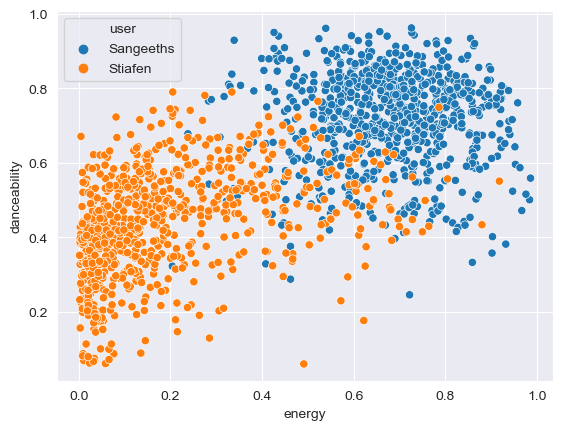

In [45]:
sns.scatterplot(data=allAudioFeatures, x="energy", y="danceability", hue="user")

<AxesSubplot:xlabel='tempo', ylabel='loudness'>

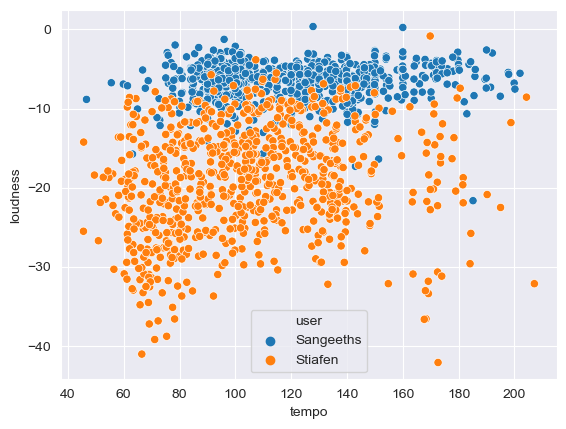

In [31]:
sns.scatterplot(data=allAudioFeatures, x="tempo", y="loudness", hue="user")

<AxesSubplot:xlabel='speechiness', ylabel='acousticness'>

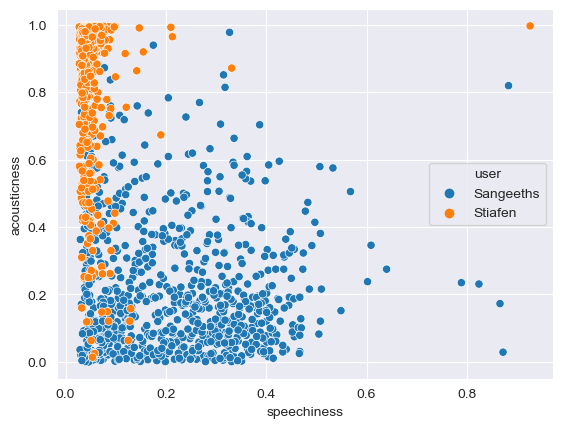

In [34]:
sns.scatterplot(data=allAudioFeatures, x="speechiness", y="acousticness", hue="user")

<AxesSubplot:xlabel='liveness', ylabel='instrumentalness'>

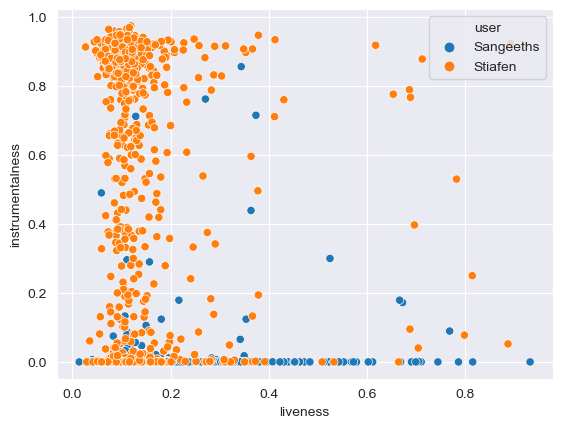

In [33]:
sns.scatterplot(data=allAudioFeatures, x="liveness", y="instrumentalness", hue="user")

<AxesSubplot:xlabel='energy', ylabel='loudness'>

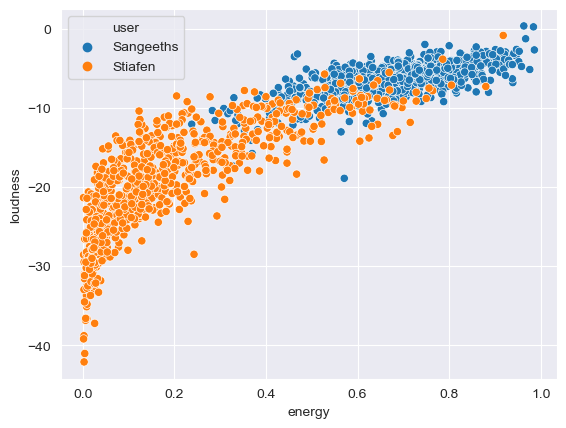

In [35]:
sns.scatterplot(data=allAudioFeatures, x="energy", y="loudness", hue="user")

<AxesSubplot:xlabel='tempo', ylabel='danceability'>

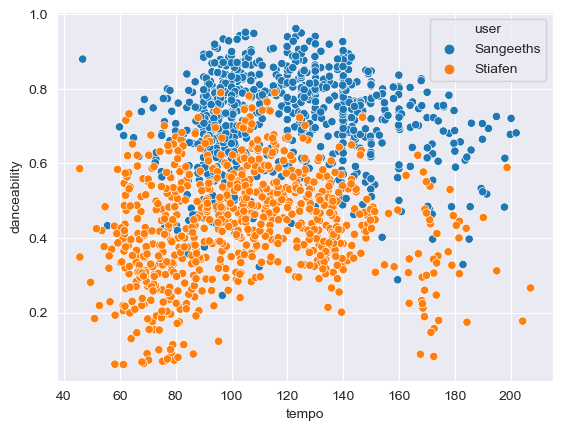

In [36]:
sns.scatterplot(data=allAudioFeatures, x="tempo", y="danceability", hue="user")

<AxesSubplot:xlabel='instrumentalness', ylabel='loudness'>

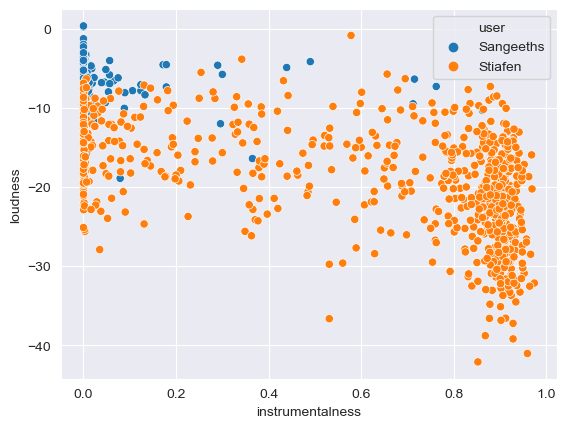

In [37]:
sns.scatterplot(data=allAudioFeatures, x="instrumentalness", y="loudness", hue="user")

<AxesSubplot:xlabel='liveness', ylabel='loudness'>

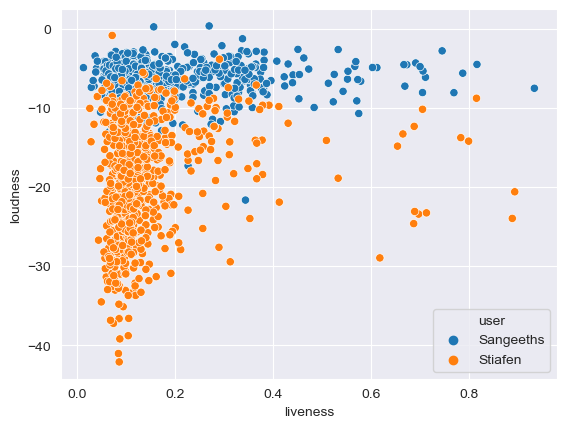

In [38]:
sns.scatterplot(data=allAudioFeatures, x="liveness", y="loudness", hue="user")

<AxesSubplot:xlabel='instrumentalness', ylabel='speechiness'>

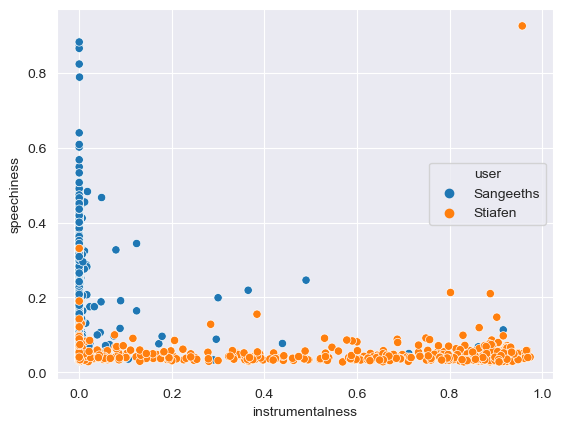

In [39]:
sns.scatterplot(data=allAudioFeatures, x="instrumentalness", y="speechiness", hue="user")

<AxesSubplot:xlabel='loudness', ylabel='danceability'>

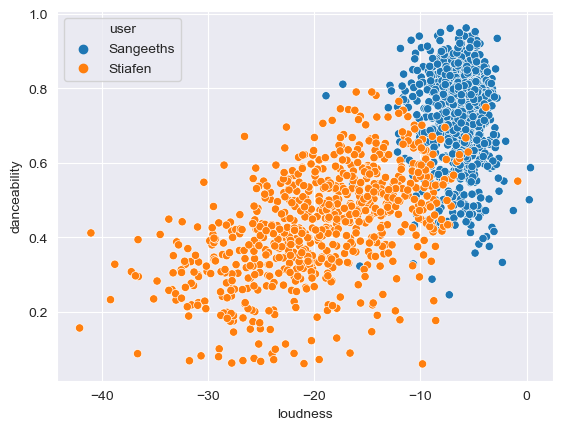

In [42]:
sns.scatterplot(data=allAudioFeatures, x="loudness", y="danceability", hue="user")